In [1]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 17.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
import numpy as np
import pandas as pd
import math
import random
import seaborn as sns
from scipy.stats import pearsonr, jarque_bera
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score, classification_report, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")


# **Modelling**

In [3]:
df = pd.read_csv('/content/diabetes_clean.csv')

print(df.head())
print(df.columns)

   Unnamed: 0  Glucose   BMI  Age  Pregnancies  DiabetesPedigreeFunction  \
0           0      148  33.6   50            6                     0.627   
1           1       85  26.6   31            1                     0.351   
2           2      183  23.3   32            8                     0.672   
3           3       89  28.1   21            1                     0.167   
4           5      116  25.6   30            5                     0.201   

   Insulin  Outcome  
0        0        1  
1        0        0  
2        0        1  
3       94        0  
4        0        0  
Index(['Unnamed: 0', 'Glucose', 'BMI', 'Age', 'Pregnancies',
       'DiabetesPedigreeFunction', 'Insulin', 'Outcome'],
      dtype='object')


In [4]:
# Define X and y
X = df.drop(columns=['Outcome', 'Unnamed: 0'], axis=1)
y = df.Outcome


In [5]:
X.head()

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Insulin
0,148,33.6,50,6,0.627,0
1,85,26.6,31,1,0.351,0
2,183,23.3,32,8,0.672,0
3,89,28.1,21,1,0.167,94
4,116,25.6,30,5,0.201,0


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.97096032,  0.23620211,  1.560567  ,  0.67318795,  0.79373836,
        -0.79790091],
       [-1.17716228, -0.84103479, -0.15898394, -0.85143798, -0.3077819 ,
        -0.79790091],
       [ 2.16436176, -1.34887504, -0.06848126,  1.28303832,  0.97333406,
        -0.79790091],
       ...,
       [ 0.05033635, -0.90259118, -0.24948662,  0.36826276, -0.73082954,
         0.6200553 ],
       [ 0.22082227, -0.30241634,  1.28905896, -0.85143798, -0.31576393,
        -0.79790091],
       [-0.90438481, -0.25624904, -0.88300539, -0.85143798, -0.45145846,
        -0.79790091]])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify=y, random_state=42)

# **Logistic Regression**

In [59]:
clf_lr = LogisticRegression()
# train the classifier
clf_lr.fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)
# printing the test accuracy
print("The test accuracy score of Logistric Regression Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Logistric Regression Classifier is  0.8


In [60]:
print("The Classification Report of Logistic Regression Classifer")
print(classification_report(y_test, y_pred))

The Classification Report of Logistic Regression Classifer
              precision    recall  f1-score   support

           0       0.79      0.96      0.87        91
           1       0.84      0.48      0.61        44

    accuracy                           0.80       135
   macro avg       0.82      0.72      0.74       135
weighted avg       0.81      0.80      0.78       135



In [61]:
# Logistic regression classifier with hyperparameter
clf_lr = LogisticRegression()

param_grid1 = {
    'max_iter': [30, 50, 100, 150],
    'multi_class': ['auto'],
    'solver' : ['lbfgs', 'newton-cholesky']
}

gs1 = GridSearchCV(
        estimator= clf_lr,
        param_grid = param_grid1,
        cv=5,
        n_jobs=-1,
        scoring='accuracy'
    )

fit_clf_lr = gs1.fit(X_train, y_train)

print(fit_clf_lr.best_score_)
print(fit_clf_lr.best_params_)

0.7791623399100034
{'max_iter': 50, 'multi_class': 'auto', 'solver': 'lbfgs'}


In [62]:
y_pred = fit_clf_lr.predict(X_test)
print("The Classification Report of Logistic Regression Classifer")
print(classification_report(y_test, y_pred))

The Classification Report of Logistic Regression Classifer
              precision    recall  f1-score   support

           0       0.79      0.95      0.86        91
           1       0.81      0.48      0.60        44

    accuracy                           0.79       135
   macro avg       0.80      0.71      0.73       135
weighted avg       0.80      0.79      0.78       135



# **Decision Tree**

In [12]:
clf_dt = DecisionTreeClassifier()
# train the classifier
clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X_test)
# printing the test accuracy
print("The test accuracy score of Decision Tree Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree Classifier is  0.7333333333333333


In [13]:
print("The Classification Report of Decision Tree Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        91
           1       0.61      0.52      0.56        44

    accuracy                           0.73       135
   macro avg       0.69      0.68      0.68       135
weighted avg       0.73      0.73      0.73       135



In [14]:
# Decision Tree classifier with hyperparameter
clf_dt = DecisionTreeClassifier()

param_grid1 = {'min_samples_leaf': [1, 10, 100],
               'max_depth': [1, 10, 20, 30],
               'criterion': ['gini', 'entropy']}

gs1 = GridSearchCV(
        estimator=clf_dt,
        param_grid = param_grid1,
        cv=5,
        n_jobs=-1,
        scoring='accuracy'
    )

fit_clf_dt = gs1.fit(X_train, y_train)

print(fit_clf_dt.best_score_)
print(fit_clf_dt.best_params_)

0.7494980962270682
{'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 10}


In [15]:
y_pred = fit_clf_dt.predict(X_test)
print("The Classification Report of Decision Tree Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        91
           1       0.62      0.48      0.54        44

    accuracy                           0.73       135
   macro avg       0.69      0.67      0.68       135
weighted avg       0.72      0.73      0.72       135



# **Random Forest**

In [16]:
clf_rf = RandomForestClassifier()
# train the classifier
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)
# printing the test accuracy
print("The test accuracy score of Random Forest Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest Classifier is  0.7555555555555555


In [17]:
print("The Classification Report of Random Forest Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of Random Forest Classifier
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        91
           1       0.70      0.43      0.54        44

    accuracy                           0.76       135
   macro avg       0.74      0.67      0.68       135
weighted avg       0.75      0.76      0.74       135



In [18]:
# Random Forest classifier with hyperparameter
clf_rf = RandomForestClassifier()

param_grid1 = {'n_estimators': [100, 200, 300, 400],
               'max_depth': [3, 5, 7, 9],
               'criterion': ['gini', 'entropy']}

gs1 = GridSearchCV(
        estimator=clf_rf,
        param_grid = param_grid1,
        cv=5,
        n_jobs=-1,
        scoring='accuracy'
    )

fit_clf_rf = gs1.fit(X_train, y_train)

print(fit_clf_rf.best_score_)
print(fit_clf_rf.best_params_)

0.7791623399100035
{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 100}


In [19]:
y_pred = fit_clf_rf.predict(X_test)
print("The Classification Report of Random Forest Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of Random Forest Classifier
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        91
           1       0.68      0.48      0.56        44

    accuracy                           0.76       135
   macro avg       0.73      0.68      0.70       135
weighted avg       0.75      0.76      0.74       135



# **K-Nearest Neighbors**

In [20]:
clf_knn = KNeighborsClassifier()
# train the classifier
clf_knn.fit(X_train, y_train)
y_pred = clf_knn.predict(X_test)
# printing the test accuracy
print("The test accuracy score of K-Nearest Neighbors Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of K-Nearest Neighbors Classifier is  0.725925925925926


In [21]:
print("The Classification Report of K-Nearest Neighbors Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of K-Nearest Neighbors Classifier
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        91
           1       0.60      0.48      0.53        44

    accuracy                           0.73       135
   macro avg       0.69      0.66      0.67       135
weighted avg       0.71      0.73      0.72       135



In [22]:
# K-Nearest Neighbors Classifier with hyperparameter
clf_knn = KNeighborsClassifier()

param_grid1 = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

gs1 = GridSearchCV(
        estimator=clf_knn,
        param_grid=param_grid1,
        cv=5,
        scoring='accuracy'
        )

fit_clf_knn = gs1.fit(X_train, y_train)

print(fit_clf_knn.best_score_)
print(fit_clf_knn.best_params_)

0.7606784354447906
{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}


In [23]:
y_pred = fit_clf_knn.predict(X_test)
print("The Classification Report of K_Nearest Neighbors Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of K_Nearest Neighbors Classifier
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        91
           1       0.62      0.48      0.54        44

    accuracy                           0.73       135
   macro avg       0.69      0.67      0.68       135
weighted avg       0.72      0.73      0.72       135



# **Support Vector Machine**

In [24]:
clf_svm = SVC()
# train the classifier
clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
# printing the test accuracy
print("The test accuracy score of Support Vector Machine Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Support Vector Machine Classifier is  0.7703703703703704


In [25]:
print("The Classification Report of Support Vector Machine Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of Support Vector Machine Classifier
              precision    recall  f1-score   support

           0       0.77      0.95      0.85        91
           1       0.78      0.41      0.54        44

    accuracy                           0.77       135
   macro avg       0.78      0.68      0.69       135
weighted avg       0.77      0.77      0.75       135



In [63]:
# Support Machine Classifier with hyperparameter
clf_svm = SVC(probability=True)

param_grid1 = {'C': [0.1, 1, 10],
              'kernel': ['linear']}

gs1 = GridSearchCV(
        estimator=clf_svm,
        param_grid = param_grid1,
        cv=5,
        scoring='accuracy'
    )

fit_clf_svm = gs1.fit(X_train, y_train)

print(fit_clf_svm.best_score_)
print(fit_clf_svm.best_params_)

0.784717895465559
{'C': 1, 'kernel': 'linear'}


In [64]:
y_pred = fit_clf_svm.predict(X_test)
print("The Classification Report of Support Vector Machine Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of Support Vector Machine Classifier
              precision    recall  f1-score   support

           0       0.79      0.96      0.87        91
           1       0.84      0.48      0.61        44

    accuracy                           0.80       135
   macro avg       0.82      0.72      0.74       135
weighted avg       0.81      0.80      0.78       135



# **Naives Bayes**

In [53]:
clf_nb = GaussianNB()
# train the classifier
clf_nb.fit(X_train, y_train)
y_pred = clf_nb.predict(X_test)
# printing the test accuracy
print("The test accuracy score of Naives Bayes Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Naives Bayes Classifier is  0.7703703703703704


In [54]:
print ("The Classification Report of Naives Bayes Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of Naives Bayes Classifier
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        91
           1       0.72      0.48      0.58        44

    accuracy                           0.77       135
   macro avg       0.75      0.69      0.71       135
weighted avg       0.76      0.77      0.76       135



In [55]:
# Naives Bayes Classifier with hyperparameter
clf_nb = GaussianNB()

param_grid1 = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}

gs1 = GridSearchCV(
        estimator=clf_nb,
        param_grid = param_grid1,
        cv=5,
        scoring='accuracy'
    )

fit_clf_nb = gs1.fit(X_train, y_train)

print(fit_clf_nb.best_score_)
print(fit_clf_nb.best_params_)

0.7772931810314988
{'var_smoothing': 1e-06}


In [56]:
y_pred = fit_clf_nb.predict(X_test)
print("The Classification Report of Naives Bayes Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of Naives Bayes Classifier
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        91
           1       0.71      0.45      0.56        44

    accuracy                           0.76       135
   macro avg       0.74      0.68      0.70       135
weighted avg       0.76      0.76      0.75       135



# **XG Boost**

In [44]:
clf_xgb = XGBClassifier()
# train the classifier
clf_xgb.fit(X_train, y_train)
y_pred = clf_xgb.predict(X_test)
# printing the test accuracy
print("The test accuracy score of XG Boost Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of XG Boost Classifier is  0.7481481481481481


In [45]:
print("The Classification Report of XG Boost Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of XG Boost Classifier
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        91
           1       0.64      0.52      0.57        44

    accuracy                           0.75       135
   macro avg       0.71      0.69      0.70       135
weighted avg       0.74      0.75      0.74       135



In [46]:
# XG Boost Classifier with hyperparameter
clf_xgb = XGBClassifier()

param_grid1 = {'learning_rate': [0.01, 0.1, 0.2],
                'n_estimators': [100, 200, 300],
                'max_depth': [3, 4, 5],}

gs1 = GridSearchCV(
        estimator=clf_xgb,
        param_grid = param_grid1,
        cv=5,
        scoring='accuracy'
    )

fit_clf_xgb = gs1.fit(X_train, y_train)

print(fit_clf_xgb.best_score_)
print(fit_clf_xgb.best_params_)

0.7754413291796469
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


In [47]:
y_pred = fit_clf_xgb.predict(X_test)
print("The Classification Report of XG Boost Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of XG Boost Classifier
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        91
           1       0.69      0.45      0.55        44

    accuracy                           0.76       135
   macro avg       0.73      0.68      0.69       135
weighted avg       0.75      0.76      0.74       135



# **MLP Classifier**

In [40]:
clf_mlp = MLPClassifier()
# train the classifier
clf_mlp.fit(X_train, y_train)
y_pred = clf_mlp.predict(X_test)
# printing the test accuracy
print("The test accuracy score of MLP Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of MLP Classifier is  0.7037037037037037


In [41]:
print("The Classification Report of MLP Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of MLP Classifier
              precision    recall  f1-score   support

           0       0.73      0.88      0.80        91
           1       0.58      0.34      0.43        44

    accuracy                           0.70       135
   macro avg       0.66      0.61      0.61       135
weighted avg       0.68      0.70      0.68       135



In [42]:
# MLP Classifier with hyperparameter
clf_mlp = MLPClassifier()

param_grid1 = {'hidden_layer_sizes': [1, 10, 20, 30],
               'activation': ['tanh', 'relu'],
               'solver': ['lbfgs', 'adam', 'sgd']}

gs1 = GridSearchCV(
        estimator=clf_mlp,
        param_grid = param_grid1,
        cv=5,
        n_jobs=-1,
        scoring='accuracy'
    )

fit_clf_mlp = gs1.fit(X_train, y_train)

print(fit_clf_mlp.best_score_)
print(fit_clf_mlp.best_params_)

0.7532364139840776
{'activation': 'relu', 'hidden_layer_sizes': 20, 'solver': 'lbfgs'}


In [43]:
y_pred = fit_clf_mlp.predict(X_test)
print("The Classification Report of MLP Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of MLP Classifier
              precision    recall  f1-score   support

           0       0.76      0.92      0.84        91
           1       0.72      0.41      0.52        44

    accuracy                           0.76       135
   macro avg       0.74      0.67      0.68       135
weighted avg       0.75      0.76      0.73       135



# **ROC Analysis**

In [48]:
# Predict the probabilities for the positive class
y_pred_logreg = fit_clf_lr.predict_proba(X_test)[:, 1]
y_pred_rf = fit_clf_rf.predict_proba(X_test)[:, 1]
y_pred_dt= fit_clf_dt.predict_proba(X_test)[:, 1]
y_pred_knn= fit_clf_knn.predict_proba(X_test)[:, 1]
y_pred_svm= fit_clf_svm.predict_proba(X_test)[:, 1]
y_pred_nb= fit_clf_nb.predict_proba(X_test)[:, 1]
y_pred_xgb= fit_clf_xgb.predict_proba(X_test)[:, 1]
y_pred_mlp= fit_clf_mlp.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC scores
auc_logreg = roc_auc_score(y_test, y_pred_logreg)
auc_rf = roc_auc_score(y_test, y_pred_rf)
auc_dt = roc_auc_score(y_test, y_pred_dt)
auc_knn = roc_auc_score(y_test, y_pred_knn)
auc_svm = roc_auc_score(y_test, y_pred_svm)
auc_nb = roc_auc_score(y_test, y_pred_nb)
auc_xgb = roc_auc_score(y_test, y_pred_xgb)
auc_mlp = roc_auc_score(y_test, y_pred_mlp)

print(f"AUC-ROC for Logistic Regression: {auc_logreg}")
print(f"AUC-ROC for Random Forest: {auc_rf}")
print(f"AUC-ROC for Decision Tree: {auc_dt}")
print(f"AUC-ROC for K-Nearest Neighbors: {auc_knn}")
print(f"AUC-ROC for Support Vector Machine: {auc_svm}")
print(f"AUC-ROC for Naives Bayes: {auc_nb}")
print(f"AUC-ROC for XGBoost: {auc_xgb}")
print(f"AUC-ROC for MLP: {auc_mlp}")

AUC-ROC for Logistic Regression: 0.8359140859140859
AUC-ROC for Random Forest: 0.8074425574425574
AUC-ROC for Decision Tree: 0.7837162837162837
AUC-ROC for K-Nearest Neighbors: 0.772977022977023
AUC-ROC for Support Vector Machine: 0.8359140859140859
AUC-ROC for Naives Bayes: 0.8411588411588411
AUC-ROC for XGBoost: 0.8394105894105893
AUC-ROC for MLP: 0.7167832167832169


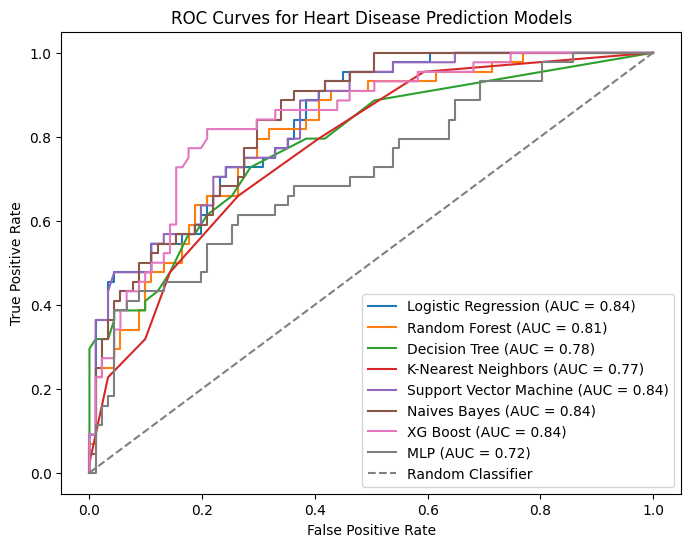

In [49]:
def plot_roc_curves(y_test, y_pred_logreg, y_pred_rf, y_pred_dt, y_pred_knn, y_pred_svm, y_pred_nb, y_pred_xgb,y_pred_mlp):
    plt.figure(figsize=(8, 6))

    # Calculate ROC curves for each model
    fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_logreg)
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
    fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
    fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
    fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_nb)
    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb)
    fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_mlp)

    # Plot ROC curves
    plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
    plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
    plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
    plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (AUC = {auc_knn:.2f})')
    plt.plot(fpr_svm, tpr_svm, label=f'Support Vector Machine (AUC = {auc_svm:.2f})')
    plt.plot(fpr_nb, tpr_nb, label=f'Naives Bayes (AUC = {auc_nb:.2f})')
    plt.plot(fpr_xgb, tpr_xgb, label=f'XG Boost (AUC = {auc_xgb:.2f})')
    plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {auc_mlp:.2f})')

    # Plot random classifier
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')


    # Format the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Heart Disease Prediction Models')
    plt.legend()
    plt.show()

plot_roc_curves(y_test, y_pred_logreg, y_pred_rf, y_pred_dt, y_pred_knn, y_pred_svm, y_pred_nb, y_pred_xgb, y_pred_mlp)

In [50]:
def find_rates_for_thresholds(y_test, y_pred, threshold):
    fpr_list = []
    tpr_list = []
    for threshold in thresholds:
        y_pred_binary = (y_pred > threshold).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
        fpr = fp / (fp + tn)
        tpr = tp / (tp + fn)
        fpr_list.append(fpr)
        tpr_list.append(tpr)
    return fpr_list, tpr_list

thresholds = np.arange(0, 1.1, 0.1)

fpr_logreg, tpr_logreg = find_rates_for_thresholds(y_test, y_pred_logreg, thresholds)
fpr_rf, tpr_rf = find_rates_for_thresholds(y_test, y_pred_rf, thresholds)
fpr_dt, tpr_dt = find_rates_for_thresholds(y_test, y_pred_dt, thresholds)
fpr_knn, tpr_knn = find_rates_for_thresholds(y_test, y_pred_knn, thresholds)
fpr_svm, tpr_svm = find_rates_for_thresholds(y_test, y_pred_svm, thresholds)
fpr_nb, tpr_nb = find_rates_for_thresholds(y_test, y_pred_nb, thresholds)
fpr_xgb, tpr_xgb = find_rates_for_thresholds(y_test, y_pred_xgb, thresholds)
fpr_mlp, tpr_mlp = find_rates_for_thresholds(y_test, y_pred_mlp, thresholds)


summary_df = pd.DataFrame({
    'Threshold': thresholds,
    'FPR_logreg' : fpr_logreg,
    'FPR_rf' : fpr_rf,
    'FPR_dt' : fpr_dt,
    'FPR_knn' : fpr_knn,
    'FPR_svm' : fpr_svm,
    'FPR_nb' : fpr_nb,
    'FPR_xgb' : fpr_xgb,
    'FPR_mlp' : fpr_mlp,
    'TPR_logreg' : tpr_logreg,
    'TPR_rf' : tpr_rf,
    'TPR_dt' : tpr_dt,
    'TPR_knn' : tpr_knn,
    'TPR_svm' : tpr_svm,
    'TPR_nb' : tpr_nb,
    'TPR_xgb' : tpr_xgb,
    'TPR_mlp' : tpr_mlp})

print(summary_df)

    Threshold  FPR_logreg    FPR_rf    FPR_dt   FPR_knn   FPR_svm    FPR_nb  \
0         0.0    1.000000  0.989011  0.505495  0.593407  1.000000  1.000000   
1         0.1    0.637363  0.604396  0.285714  0.593407  0.725275  0.439560   
2         0.2    0.384615  0.384615  0.208791  0.406593  0.384615  0.307692   
3         0.3    0.208791  0.263736  0.208791  0.263736  0.219780  0.219780   
4         0.4    0.109890  0.197802  0.175824  0.263736  0.109890  0.142857   
5         0.5    0.054945  0.109890  0.142857  0.142857  0.032967  0.087912   
6         0.6    0.032967  0.054945  0.120879  0.098901  0.010989  0.054945   
7         0.7    0.010989  0.010989  0.043956  0.098901  0.010989  0.032967   
8         0.8    0.010989  0.010989  0.010989  0.032967  0.010989  0.021978   
9         0.9    0.000000  0.000000  0.000000  0.000000  0.000000  0.010989   
10        1.0    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

     FPR_xgb   FPR_mlp  TPR_logreg    TPR_rf    TPR

# **The Best Model : Naives Bayes**

In [65]:
import pickle
# Menyimpan model terbaik dengan pickle
pklname = "best_model_nb.pkl"

with open(pklname, 'wb') as file:
    pickle.dump(fit_clf_nb, file)